We're running the Aemulus beta sims to output all particles. Now we need to delete the snapshots we don't need. However there is a bug where there can be off by one errors in the snap numbers. So I'm gonna manually confirm the actual redshifts of them before deleting them. 

Box000_sherlock snaps to save
* 68 (z= 5.0)
* 97 (z= 3.0)
* 119 (z =2.0)
* 149 (z=1.0)
* 155 (z=0.85)
* 161 (z=0.7)
* 168 (z=0.55)
* 175 (z=0.4)
* 184 (z=0.25)
* 188 (z = 0.17)
* 193 (z=0.1)
* 196 (z=0.05)
* 200 (z=0.0)

In [1]:
import numpy as np
from pearce.mocks.readGadgetSnapshot import readGadgetSnapshot
from glob import glob

In [2]:
redshifts_to_keep = np.array([5.0, 3.0, 2.0, 1.0, 0.85, 0.7, 0.55, 0.4, 0.25, 0.17, 0.1, 0.05, 0.0])

In [3]:
redshifts = []
for i in xrange(202):
    fname = '/home/users/swmclau2/oak/../../aemulus/highres_emu/Box000_sherlock/output/snapdir_{0:03d}/snapshot_{0:03d}.0'.format(i)
    header = readGadgetSnapshot(fname, read_pos=False)#[0] 
    redshifts.append(header.redshift)

In [4]:
redshifts = np.array(redshifts)

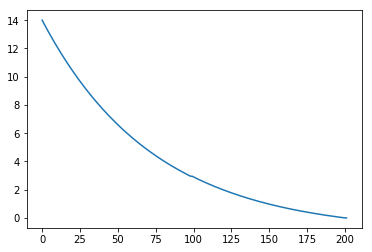

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline 
plt.plot(range(202), redshifts)

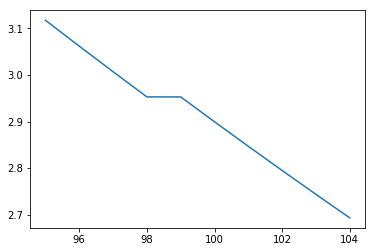

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline 
plt.plot(range(202)[95:105], redshifts[95:105])

In [8]:
idxs_to_keep = []
for z in redshifts_to_keep:
    idxs_to_keep.append(np.argmin(np.abs(z-redshifts)))

In [9]:
print np.array(idxs_to_keep)

[ 67  97 119 149 155 161 168 175 184 188 193 196 201]
